In [102]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from enhancer_utils import process_low_light_image
import os
os.getcwd()



'/workspace/KMIT_MAJOR/Python Files'

In [103]:
# Define the input image path and the model file path
input_image_path = "./archive/images/images/architecture/04_Monasterio_de_Palazuelos_absides_exterior_ni.jpg"
model_file_path = "./model_enhancer.h5"


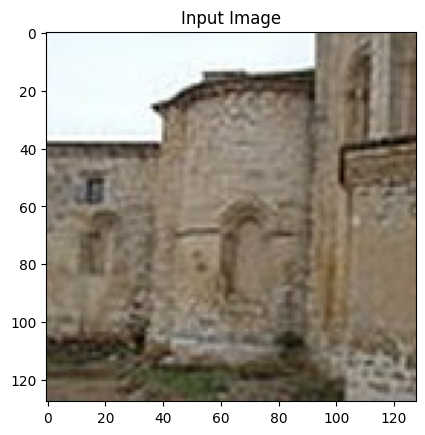

In [104]:
# Load and display the input image
input_image = cv.imread(input_image_path)
input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
plt.imshow(input_image)
plt.title("Input Image")
plt.show()



In [105]:
import cv2 as cv
import numpy as np
from keras.models import load_model

def process_low_light_image(image_path, model_path):
    def noisy(noise_typ, image):
        if noise_typ == "gauss":
            row, col, ch = image.shape
            mean = 0
            var = 0.0001
            sigma = var ** 0.05
            gauss = np.random.normal(mean, sigma, (row, col, ch))
            gauss = gauss.reshape(row, col, ch)
            noisy = gauss + image
            return noisy
        elif noise_typ == "s&p":
            row, col, ch = image.shape
            s_vs_p = 0.5
            amount = 1.0
            out = np.copy(image)
            # Salt mode
            num_salt = np.ceil(image.size * s_vs_p)
            coords = [np.random.randint(0, i, int(num_salt))
                    for i in image.shape]
            out[coords] = 1

            # Pepper mode
            num_pepper = np.ceil(image.size * (1. - s_vs_p))
            coords = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
            out[coords] = 1
            return out
        elif noise_typ == "poisson":
            vals = len(np.unique(image))
            vals = 2 ** np.ceil(np.log2(vals))
            noisy = np.random.poisson(image * vals) / float(vals)
            return noisy
        elif noise_typ == "speckle":
            row, col, ch = image.shape
            gauss = np.random.randn(row, col, ch)
            gauss = gauss.reshape(row, col, ch)
            noisy = image + image * gauss
            return noisy
    
    def ExtractTestInput(ImagePath):
        img = cv.imread(image_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, (500, 500))
        hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)  # convert it to hsv
        hsv[..., 2] = hsv[..., 2] * 0.2
        img1 = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
        img1 = img1.reshape(1, 500, 500, 3)
        return img1

    # Load the trained model
    # print(model_path)
    # print(image_path)
    model = load_model(model_path)

    # Process the input image
    # img = ExtractTestInput(image_path)
    # print("image here")
    # plt.imshow(img)
    # plt.title("enhanced 0 Image")
    # plt.show()
    # Make the prediction
    img = cv.imread(image_path)

    img = cv.resize(img, (500, 500))
    img = img.reshape(1, 500, 500, 3)
    # plt.imshow(img)
    # plt.title("enhanced -1 Image")
    # plt.show()
    prediction = model.predict(img)
    print(prediction)
    # Reshape the prediction to an image
    enhanced_image = prediction.reshape(500, 500, 3)

    return enhanced_image


1/1 [==============================] - 1s 570ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[[16585.775  13880.42   18132.494 ]
   [22093.988  15888.94   15690.459 ]
   [23802.783  14985.915  16320.205 ]
   ...
   [ 7328.3037  5256.308   5264.4365]
   [ 5486.7373  5068.155   3486.6833]
   [ 5692.4146  6242.4995  3467.3257]]

  [[24472.49   21664.63   21916.92  ]
   [25009.768  25532.64   24925.484 ]
   [27331.553  24964.516  24708.26  ]
   ...
   [ 9346.841   8791.997   8464.914 ]
   [ 8619.921   7990.3047  7728.9653]
   [ 8659.523   8864.069   6964.481 ]]

  [[21649.602  19692.53   18455.615 ]
   [21780.822  22087.367  21073.58  ]
   [24259.467  21924.572  21198.564 ]
   ...
   [ 8702.383   8314.668   7986.666 ]
   [ 8309.421   7796.102   7729.141 ]
   [ 8595.154   8950.337   7096.612 ]]

  ...

  [[ 6152.3833  5026.656   4773.586 ]
   [ 6868.936   6603.242   5991.33  ]
   [ 7424.4644  6687.708   5918.991 ]
   ...
   [10044.974   9899.266   8373.711 ]
   [10553.814   9736.911   8695.684 ]
   [10194.266   9522.435   7533.199 ]]

  [[ 4967.392   3957.8438  4084.7124]
   [ 61

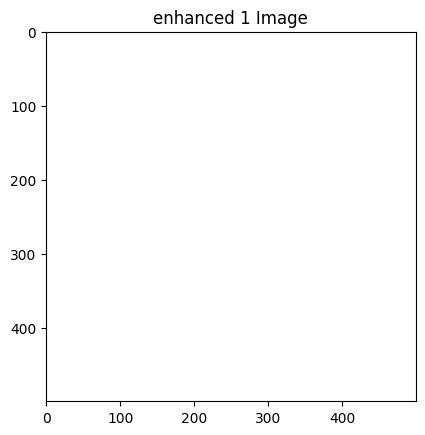

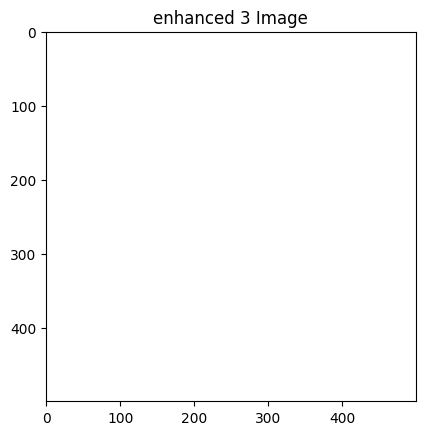

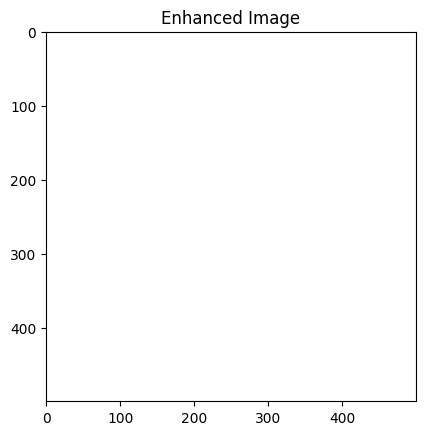

In [106]:
# Preprocess the input image
# preprocessed_image = preprocess_input_image(input_image_path)

# Display the preprocessed image
# plt.imshow(preprocessed_image)
# plt.title("Preprocessed Image")
# plt.show()

# Process the low-light image using the saved model
enhanced_image = process_low_light_image(input_image_path, model_file_path)
# print(input_image_path)
# print(model_file_path)
plt.imshow(enhanced_image)
plt.title("enhanced 1 Image")
plt.show()
# Normalize the enhanced image
enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)
# plt.imshow(enhanced_image)
# plt.title("enhanced 2 Image")
# plt.show()

# Save the enhanced image in JPEG format
output_image_path = "enhanced_image.jpg"
enhanced_image_bgr = cv.cvtColor(enhanced_image, cv.COLOR_RGB2BGR)
cv.imwrite(output_image_path, enhanced_image_bgr)
plt.imshow(enhanced_image_bgr)
plt.title("enhanced 3 Image")
plt.show()

# Display the enhanced image
plt.imshow(enhanced_image)
plt.title("Enhanced Image")
plt.show()